In [1]:
## all imports
from IPython.display import HTML, Image
import numpy as np
# import urllib2
import requests
import bs4 #this is beautiful soup

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf

cf.set_config_file(sharing=True, offline=False, theme='ggplot', world_readable=True)

CS109
=====

Verena Kaynig-Fittkau

* vkaynig@seas.harvard.edu
* staff@cs109.org

Announcements
==============

* Nice page to promote your projects

http://sites.fas.harvard.edu/~huit-apps/archive/index.html

Announcements
==============

* HW1 solutions are online
* Awesome TFs are trying to get the grading done this week
* be proactive:
    - start early
    - use office hours and Piazza
    - if resources are not enough: let us know!

Announcements
==============

* homework submission format
    - create a folder lastname_firstinitial_hw# 
    - place the notebook and any others files into that folder
    - notebooks should be executed
    - compress the folder
    - submit to iSites

Todays lecture:
===============

* all about data scraping
* ***What is it? ***
* How to do it:
    - from a website
    - with an API
* Plus: Some more SVD!

Answer: Data scraping is about obtaining data from webpages. There is low level scraping where you parse the data out of the html code of the webpage. There also is scraping over APIs from websites who try to make your life a bit easier.


API registrations
=================

* Rotten Tomatoes

http://developer.rottentomatoes.com/member/register

* Twitter

https://apps.twitter.com/app/new

* Twitter instructions

https://twittercommunity.com/t/how-to-get-my-api-key/7033

Python data scraping
====================

* Why scrape the web?
    - vast source of information
    - automate tasks
    - keep up with sites
    - fun!

*** Can you think of examples ? ***
  
Answer: Some examples we had were stock market monitoring, sports data, or airline prices.

Read and Tweet!
=================

![ReadTweet](http://developer.nytimes.com/files/readtweet.jpg
 "We read we tweet")

* by Justin Blinder
* http://projects.justinblinder.com/We-Read-We-Tweet

Twitter Sentiments
=================

![TwitterSentiments](http://www.csc.ncsu.edu/faculty/healey/tweet_viz/figs/tweet-viz-ex.png
 "Twitter Sentiments")

* by Healey and Ramaswamy
* http://www.csc.ncsu.edu/faculty/healey/tweet_viz/tweet_app/

L.A. Happy Hours
===============

* http://www.downtownla.com/3_10_happyHours.asp?action=ALL

* by Katharine Jarmul

Python data scraping
====================

* copyrights and permission:
    - be careful and polite
    - give credit
    - care about media law
    - don't be evil (no spam, overloading sites, etc.)

Robots.txt
==========

![Robots.txt](images/robots_txt.jpg "Robots.txt")

Robots.txt
==========

* specified by web site owner
* gives instructions to web robots (aka your script)
* is located at the top-level directory of the web server

http://www.example.com/robots.txt

If you want you can also have a look at

http://google.com/robots.txt

Robots.txt
==========

*** What does this one do? ***

Answer: This file allows google to search through everything on the server, while all others should stay completely away.

Things to consider:
-------------------

* can be just ignored
* can be a security risk - *** Why? ***

Answer: You are basically telling everybody who cares to look into the file where you have stored sensitive information.


Scraping with Python:
=====================

* scraping is all about HTML tags
* bad news: 
    - need to learn about tags
    - websites can be ugly

HTML
=====

* HyperText Markup Language

* standard for creating webpages

* HTML tags 
    - have angle brackets
    - typically come in pairs

This is an example for a minimal webpage defined in HTML tags. The root tag is `<html>` and then you have the `<head>` tag. This part of the page typically includes the title of the page and might also have other meta information like the author or keywords that are important for search engines. The `<body>` tag marks the actual content of the page. You can play around with the `<h2>` tag trying different header levels. They range from 1 to 6. 

In [5]:
s = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

h = HTML(s)
h

Useful Tags
===========

* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`


Scraping with Python:
=====================

* example of a beautifully simple webpage:

http://www.crummy.com/software/BeautifulSoup

Scraping with Python:
=====================

* good news: 
    - some browsers help
    - look for: inspect element
    - need only basic html
    
*** Try 'Ctrl-Shift I' in Chrome ***

*** Try 'Command-Option I' in Safari ***



Scraping with Python
==================

* different useful libraries:
    - urllib
    - beautifulsoup
    - pattern
    - LXML
    - ...
    

The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [6]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = urllib2.urlopen(url).read()
#print source

Quiz :
======

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'alien video games' ?
    - hint: use `.find()`

In [12]:
## is 'Alice' in source?
print 'Alice' in source

## count occurences of 'Soup'
print source.count('Soup')

## find index of 'alien video games'
position =  source.find('alien video games')
print position

## quick test to see the substring in the source variable
## you can access strings like lists
print source[position:position + 20]

## or the tidier version:
print source[position:position + len('alien video games')]

False
41
1695
alien video games</a
alien video games


Beautiful Soup
==============

* designed to make your life easier
* many good functions for parsing html code

Some examples
=============

Now we create a beautiful soup object from the string variable source. Note that the `prettify()` function formats the output to show the different levels of the HTML code. 

In [14]:
## get bs4 object
soup = bs4.BeautifulSoup(source)
 
## compare the two print statements
# print soup
# print soup.prettify()

## show how to find all a tags
soup.findAll('a')

## ***Why does this not work? ***
soup.findAll('Soup')

[]

The last command only returns an empty list, because `Soup` is not an HTML tag. It is just a string that occours in the webpage.

Some examples
=============

In [50]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, not all tags in the string
first_tag = soup.find('a')

## get attribute `href`
first_tag.get('href')

## get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]

## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l[:4] == 'http':
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

TypeError: 'NoneType' object has no attribute '__getitem__'

In [51]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements!
# Let's verify
print sum([l is None for l in link_list])

# So there are two elements in the list that are None!

2


In [54]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['http://www.awaretek.com/python/index.html',
 'https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://www.candlemarkandgleam.com/shop/constellation-games/',
 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/b

Note: The above `if` condition works because of lazy evaluation in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

In [84]:
# another option for the if statement
# didn't know about the startswith function until it was pointed out in class. Thanks!
# and we can put this in a list comprehension as well, it almost reads like sentence.

[l for l in link_list if l is not None and l.startswith('http')]

['http://www.awaretek.com/python/index.html',
 'https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://www.candlemarkandgleam.com/shop/constellation-games/',
 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/b

Parsing the Tree
================



In [67]:
# redifining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s)

## get html root node
root_node = tree.html

## get head from root using contents
head = root_node.contents[0]

## get body from root
body = root_node.contents[1]

## could directly access body
tree.body

<body><h3> Test </h3><p>Hello world!</p></body>

Quiz:
=====

* Find the `h3` tag by parsing the tree starting at `body`
* Create a list of all __Hall of Fame__ entries listed on the Beautiful Soup webpage
    - hint: it is the only unordered list in the page (tag `ul`)


In [68]:
## get h3 tag from body
body.contents[0]

<h3> Test </h3>

In [89]:
## use ul as entry point
entry_point = soup.find('ul')

## get hall of fame list from entry point
## skip the first entry 
hall_of_fame_list = entry_point.contents[1:]

## reformat into a list containing strings
tmp = []
for li in hall_of_fame_list:
    tmp.append(li.contents)

`tmp` now is actually a list of lists containing the hall of fame entries. 
I had to ask a collegue to solve this for me, so thanks to Ray, here is some 
advanced Pythonvon how to print really just one entry per list item.

The cool things about this are: 
* The use of `""` to just access the `join` function of strings.
* The `join` function itself
* that you can actually have two nested for loops in a list comprehension

In [90]:
test =  ["".join(str(a) for a in sublist) for sublist in tmp]
print '\n'.join(test)

<a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
 Type"</a>, a work of digital art on display in the lobby of the New
 York Times building, uses Beautiful Soup to scrape news feeds.


Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.


Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.


The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.


The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.


The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA

Advanced Example
================

Designed by Katharine Jarmul
----------------------------

https://github.com/kjam/python-web-scraping-tutorial




Scraping Happy Hours
====================

Scrape the happy hour list of LA for personal preferences

http://www.downtownla.com/3_10_happyHours.asp?action=ALL

This example is part of her talk about data scraping at PyCon2014. She is a really good speaker and I enjoyed watching her talk. Check it out: http://www.youtube.com/watch?v=p1iX0uxM1w8

In [91]:
stuff_i_like = ['burger', 'sushi', 'sweet potato fries', 'BBQ']
found_happy_hours = []
my_happy_hours = []
# First, I'm going to identify the areas of the page I want to look at
url = 'http://www.downtownla.com/3_10_happyHours.asp?action=ALL'
source = urllib2.urlopen(url).read()
tables = bs4.BeautifulSoup(source)

In [92]:
# Then, I'm going to sort out the *exact* parts of the page
# that match what I'm looking for...
for t in tables.findAll('p', {'class': 'calendar_EventTitle'}):
    text = t.text
    for s in t.findNextSiblings():
        text += '\n' + s.text
    found_happy_hours.append(text)

print "The scraper found %d happy hours!" % len(found_happy_hours)

The scraper found 66 happy hours!


In [93]:
# Now I'm going to loop through the food I like
# and see if any of the happy hour descriptions match
for food in stuff_i_like:
    for hh in found_happy_hours:
        # checking for text AND making sure I don't have duplicates
        if food in hh and hh not in my_happy_hours:
            print "YAY! I found some %s!" % food
            my_happy_hours.append(hh)

print "I think you might like %d of them, yipeeeee!" % len(my_happy_hours)

YAY! I found some burger!
YAY! I found some sushi!
YAY! I found some sushi!
YAY! I found some sushi!
I think you might like 4 of them, yipeeeee!


In [94]:
# Now, let's make a mail message we can read:
message = 'Hey Katharine,\n\n\n'
message += 'OMG, I found some stuff for you in Downtown, take a look.\n\n'
message += '==============================\n'.join(my_happy_hours)
message = message.encode('utf-8')
# To read more about encoding:
# http://diveintopython.org/xml_processing/unicode.html
message = message.replace('\t', '').replace('\r', '')
message += '\n\nXOXO,\n Your Py Script'

#print message

Getting Data with an API
=========================

* API: application programming interface
* some sites try to make your life easier
* Twitter, New York Times, ImDB, rotten Tomatoes, Yelp, ...

Rotten Tomatoes
===============

![The Wizard of Oz](images/wiz_oz.png "The wizard of Oz")

http://www.rottentomatoes.com/top/


API keys
=========

* required for data access
* identifies application (you)
* monitors usage
* limits rates

Rotten Tomatoes Key
===================

http://developer.rottentomatoes.com/member/register

In [5]:
import json
import requests

api_key = 'your key here'

url = 'http://api.rottentomatoes.com/api/public/v1.0/lists/dvds/top_rentals.json?apikey=' + api_key
# data = urllib2.urlopen(url).read()
#print data

Python Dictonaries
==================

* build in data type
* uses key: value pairs

In [101]:
a = {'a': 1, 'b':2}
print a

#show keys
print a.keys()

#show values
print a.values()

#show for loop over all entries
# option 1 using zip
# this works also for iterating over any
# other two lists
for k,v in zip(a.keys(), a.values()):
    print k,v

# option 2 using the dictionary `iteritems()` function
for k,v in a.iteritems():
    print k,v

{'a': 1, 'b': 2}
['a', 'b']
[1, 2]
a 1
b 2
a 1
b 2


JSON
======

* JavaScript Object Notation
* human readable
* transmit attribute-value pairs

In [102]:
a = {'a': 1, 'b':2}
s = json.dumps(a)
a2 = json.loads(s)

## a is a dictionary
#a
## vs s is a string containing a in JSON encoding
#s
## reading back the keys are now in unicode
#a2

{'a': 1, 'b': 2}

In [116]:
## create dictionary from JSON 
dataDict = json.loads(data)

## expore dictionary
print dataDict.keys()

## there is a key named `movies` containing a list of movies as a value
movies = dataDict['movies']

## each element of the list `movies` is a dictionary
print movies[0].keys()

## one of the keys is called `ratings`
## the value is yet another dictionary
print movies[0]['ratings'].keys()

## so we made it all the way to find the critics score
print movies[0]['ratings']['critics_score']


[u'movies', u'link_template', u'links']
[u'ratings', u'links', u'title', u'critics_consensus', u'release_dates', u'abridged_cast', u'synopsis', u'mpaa_rating', u'year', u'alternate_ids', u'posters', u'runtime', u'id']
[u'critics_score', u'audience_score', u'critics_rating', u'audience_rating']
89


Quiz
=====

* build a list with critics scores
* build a list with audience scores

In [119]:
# critics scores list
critics_scores = [m['ratings']['critics_score'] for m in movies]

# audience scores list
audience_scores = [m['ratings']['audience_score'] for m in movies]

The following code shows how to create a pandas data frame with the data we gathered from the webpage.
Beware of the `set_index()` function in pandas. Per default it does not change the actual data frame! You need to either reassign the output or set the `inplace` argument to `True`.

In [135]:
## create pandas data frame with critics and audience score
scores = pd.DataFrame(data=[critics_scores, audience_scores]).transpose()
scores.columns = ['critics', 'audience']

## also create a list with all movie titles
movie_titles = [m['title'] for m in movies]

## set index of dataFrame BEWARE of inplace!
scores.set_index([movie_titles])

## the line above does not changes scores!
## You need to either reassign

scores = scores.set_index([movie_titles])

## or set the inplace argument to True
scores.set_index([movie_titles], inplace=True)
scores.head(3)

,critics,audience
Captain America: The Winter Soldier,89,93
The Amazing Spider-Man 2,53,68
Godzilla,73,69


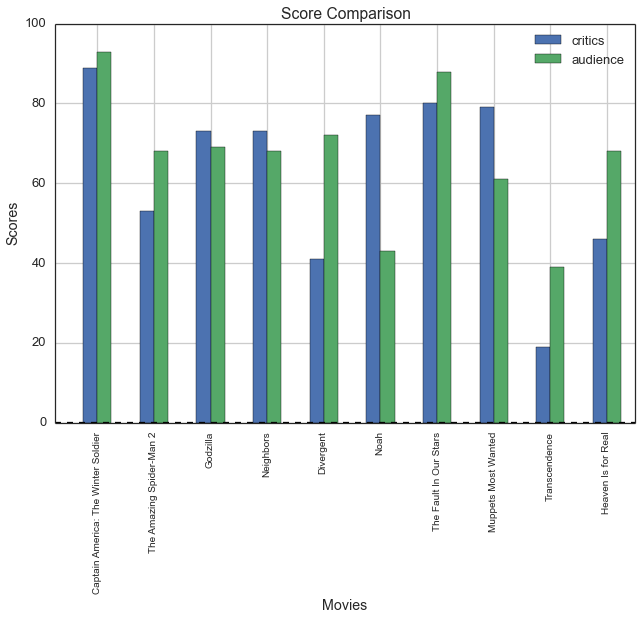

In [138]:
## create a bar plot with the data
scores.plot(kind = 'bar')

## set the title to Score Comparison
plt.title('Score Comparison')

## set the x label
plt.xlabel('Movies')

## set the y label
plt.ylabel('Scores')

## show the plot
plt.show()

Twitter Example:
================

* API a bit more complicated
* libraries make life easier
* python-twitter

https://github.com/bear/python-twitter

What we are going to do is scrape Rafael's twitter account, and then filter it for the interesting tweets. Defining interesting as tweets that have be re-tweeted at least 10 times. 


In [139]:
import twitter

## define the necessary keys
cKey = 'your consumer key here'
cSecret = 'your consumer secret here'
aKey = 'your access token key here'
aSecret = 'your access token secret here'

## create the api object with the twitter-python library
api = twitter.Api(consumer_key=cKey, consumer_secret=cSecret, access_token_key=aKey, access_token_secret=aSecret)


In [141]:
## get the user timeline with screen_name = 'rafalab'
twitter_statuses = api.GetUserTimeline(screen_name = 'rafalab')

## create a data frame
## first get a list of panda Series or dict
pdSeriesList = [pd.Series(t.AsDict()) for t in twitter_statuses]

## then create the data frame
data = pd.DataFrame(pdSeriesList)

data.head(2)

,created_at,favorite_count,favorited,hashtags,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,retweet_count,retweeted,retweeted_status,source,text,truncated,urls,user,user_mentions
0,Wed Sep 24 13:56:29 +0000 2014,7,False,NaN,514775379941548033,rstudio,NaN,235261861,en,1,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@rstudio spell checker is suggesting I correct...,False,NaN,"{u'id': 177729631, u'profile_sidebar_fill_colo...","[{u'screen_name': u'rstudio', u'id': 235261861..."
1,Mon Sep 22 13:09:38 +0000 2014,14,False,[gi2014],514038816387387392,NaN,NaN,NaN,en,10,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#gi2014 if you want more info on how to deal w...,False,{u'http://t.co/YdYAv8DLqo': u'http://genomicsc...,"{u'id': 177729631, u'profile_sidebar_fill_colo...",NaN


In [162]:
## filter tweets with enough retweet_count
maybe_interesting = data[data.retweet_count>10]

## get the text of these tweets
tweet_text = maybe_interesting.text

## print them out
text = tweet_text.values

for t in text:
    print '######'
    print t

######
RT @kwbroman: Official announce’t of new members of R core and R foundation: https://t.co/7HIjPVUFa3
Yay @eddelbuettel @hadleywickham @lawr…
######
Post inspired by @hadleywickham's critique of academia. Features @kwbroman, @jtleek, @stat110 and @hpfister efforts http://t.co/owH6C55IHj
######
RT @simplystats: Applied Statisticians: people want to learn what we do. Let's teach them. http://t.co/qpvO8jEmxL
######
Harvard Data Science course (CS109) starts today. Follow along here:  http://t.co/IqDw4lo8YX Videos, code, and slides will be made available


Extracting columns:
===================

__Warning:__ The returned column `tweet_text` is a `view` on the data
    
* it is not a copy
* you change the Series => you change the DataFrame

Below is another example of such a view:

In [169]:
## create a view for favorite_count on maybe_interesting
view = maybe_interesting['favorite_count']
print '-----------------'
print "This is view:"
print view


## change a value
view[8] = 9999

## look at original frame
print '-----------------'
print "This is view after changing view[8]"
print view

print '-----------------'
print "This is maybe_interesting after changing view[8]"
print "It changed too!"
print maybe_interesting['favorite_count']

## to avoid this you can use copy
independent_data = maybe_interesting['favorite_count'].copy()
independent_data[10] = 999
print '-----------------'
print "This is independent_data after changed at 10:"
print independent_data
print '-----------------'
print "This is maybe_interesting after changing independent_data:"
print "It did not change because we only changed a copy of it"
print maybe_interesting['favorite_count']

-----------------
This is view:
8     9999
9       24
10     NaN
13     101
Name: favorite_count, dtype: float64
-----------------
This is view after changing view[8]
8     9999
9       24
10     NaN
13     101
Name: favorite_count, dtype: float64
-----------------
This is maybe_interesting after changing view[8]
It changed too!
8     9999
9       24
10     NaN
13     101
Name: favorite_count, dtype: float64
-----------------
This is independent_data after changed at 10:
8     9999
9       24
10     999
13     101
Name: favorite_count, dtype: float64
-----------------
This is maybe_interesting after changing independent_data:
It did not change because we only changed a copy of it
8     9999
9       24
10     NaN
13     101
Name: favorite_count, dtype: float64


Singular Value Decomposition
============================

* remember Rafael's nice illustration last week

* some more python details

http://cs109.github.io/2014/pages/lectures/04-distance.html#/11



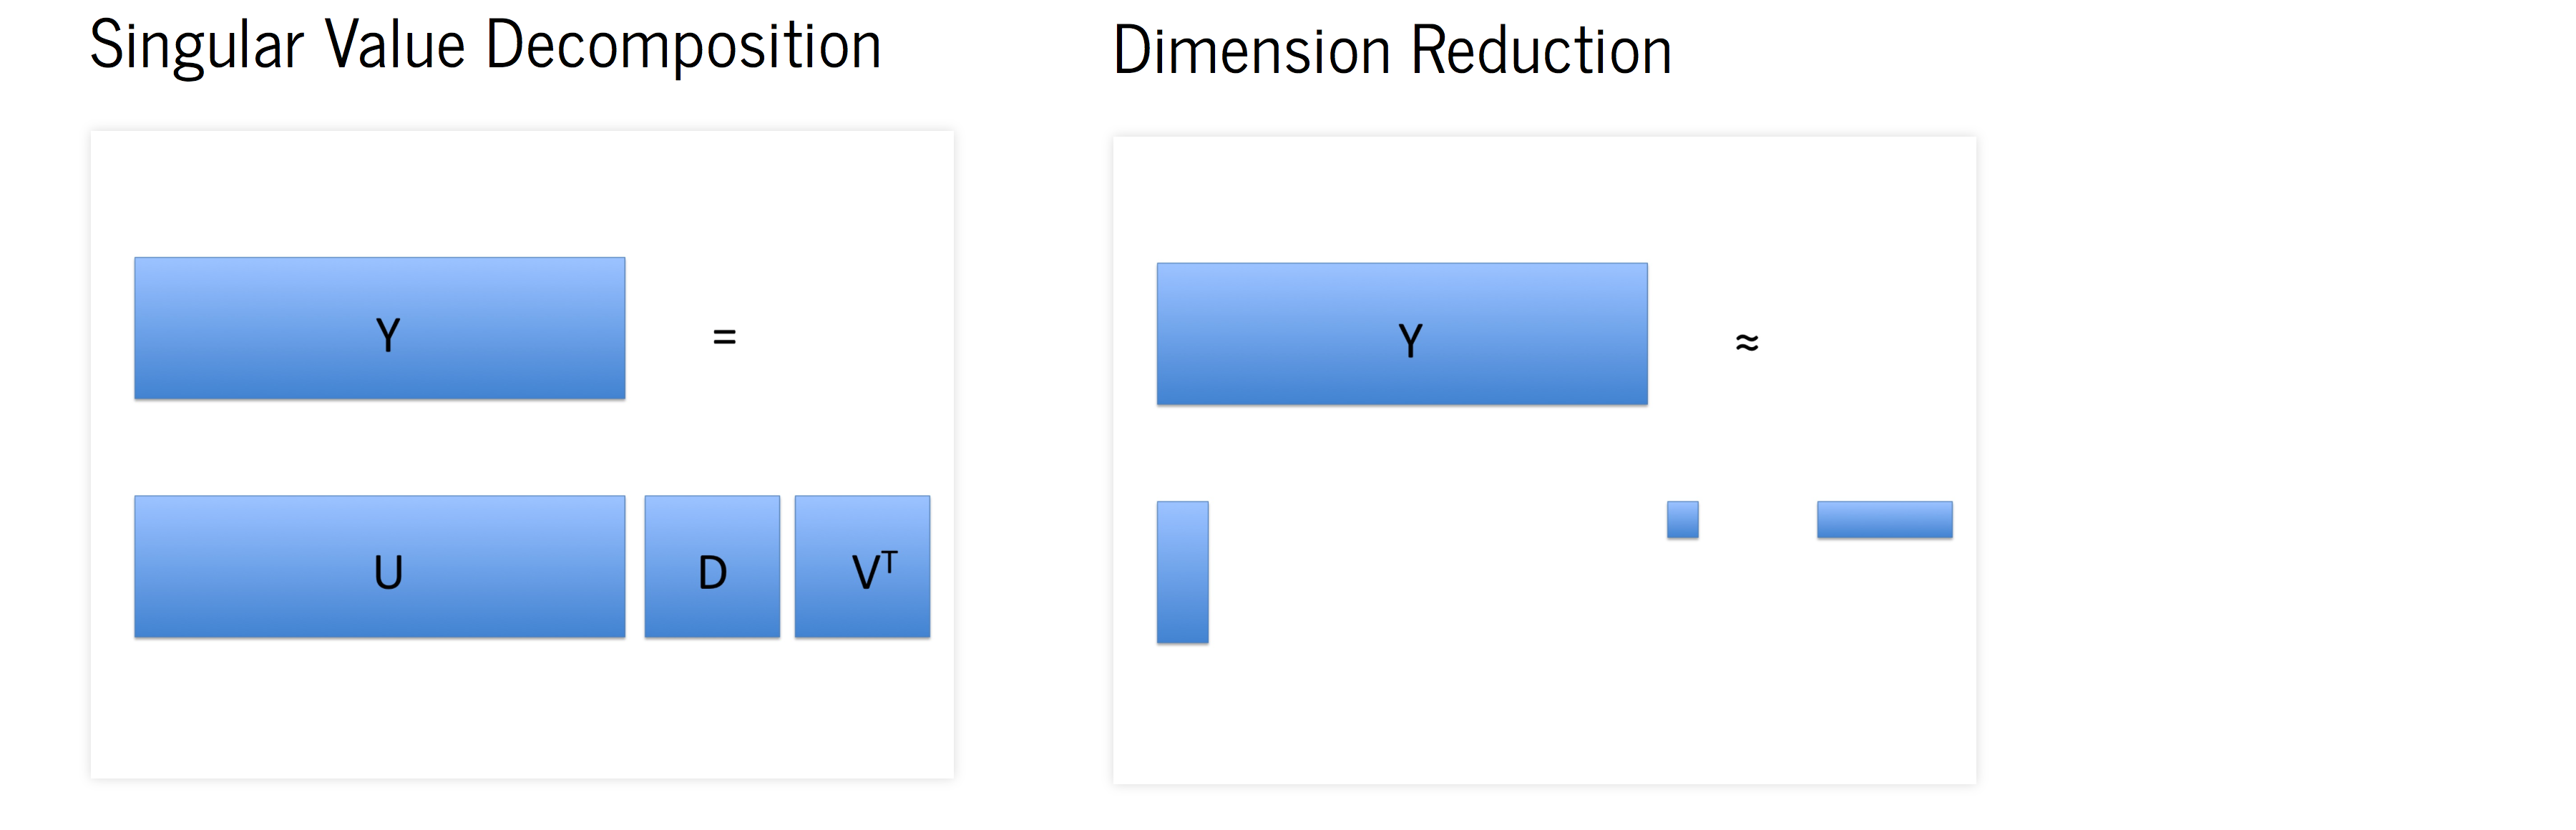

In [4]:
Image('images/svd.png')

In [171]:

import scipy

## seeding the random generate so we always get the same random numbers
np.random.seed(seed=99)

# make some data up
mean = [0,0]
cov = [[1.0,0.7],[0.7,1.0]] 
x,y = np.random.multivariate_normal(mean,cov,500).T


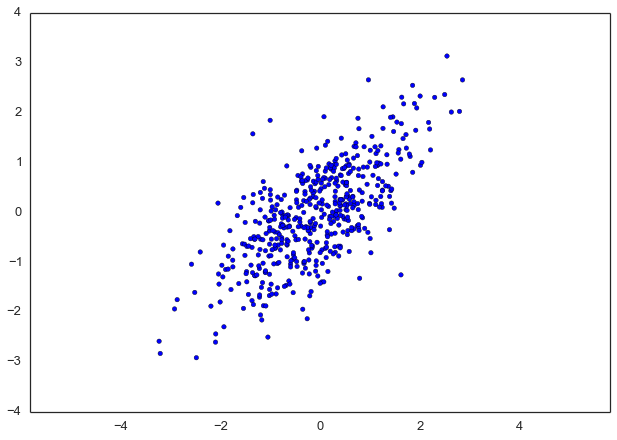

In [172]:
# plot the data
fig = plt.figure()
plt.scatter(x,y)
plt.axis('equal')
plt.show()

We only created the data points as two vectors `x` and `y`, now we want to put them into the same matrix using `column_stack()`. It does exactly what you would expect. Stack the two column vectors together.
Then we use the linear algebra library of `scipy` to compute the singular value decomposition. The function gives us the matrices `U` and `Vh`, but `s` is only returned as a vector. In order to use `s` to reconstruct the data or project it down to one dimension we need to convert `s` into a diagonal matrix containing only zeros and the values of `s` in the diagonal. As this is a common computation, the library provides us with a convenient function for this: `diagsvd`. 

In [173]:
## create a data matrix
matrix = np.column_stack((x,y))
## compute SVD
U,s,Vh = scipy.linalg.svd(matrix)
## blow up s
S = scipy.linalg.diagsvd(s, 500, 2)
## reconstruct the data (sanity test)
reconstruction = np.dot(U, np.dot(S, Vh))

## check the results
print(matrix[1,:])
print(reconstruction[1,:])
## the allclose() function allows for the data points to deviate by a small
## epsilon and still be considered correctly reconstructed.
print np.allclose(matrix, reconstruction)

[-0.77618857  0.25387936]
[-0.77618857  0.25387936]
True


In the following plot you can see the columns of V visualized along with the data points. The thing to note is that the vectors are orthogonal to each other and that the first vector runs along the direction of the most variance in the data. In a way it is capturing the main source of information. These vectors are also called the principal components of the data. 

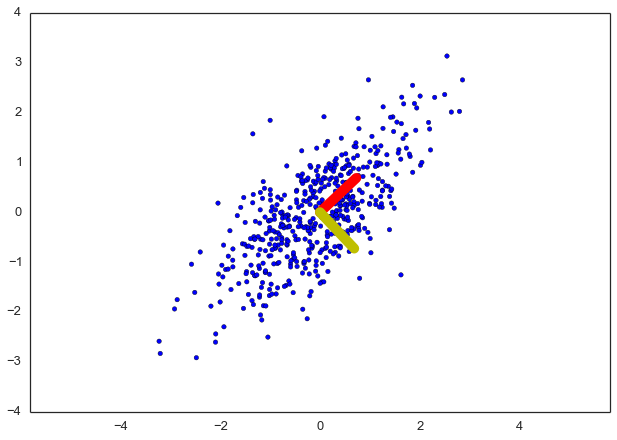

In [174]:
# show the column vectors of V
V = Vh.T
plt.scatter(x, y)
plt.plot([0, V[0,0]], [0,V[1,0]], c='r', linewidth=10.0)
plt.plot([0, V[0,1]], [0,V[1,1]], c='y', linewidth=10.0)
plt.axis('equal')
plt.show()

The following code shows how to project the two dimensional data points down into one dimension. We basically project the data onto the red line in the plot above. The second option shown also works to apply the same projection to new data points that were generated from the same source as the data we used to calculate the SVD. 

In [175]:
# two ways to project the data
projection = np.dot(U, S[:,:1])
projection2 = np.dot(matrix, V[:,:1])
np.allclose(projection, projection2)

True

The following plot shows where the original two dimensional data points end up in the projected version. What you can see is that the points at the outer ends of the data cloud also are at the outer ends of the projected points. 

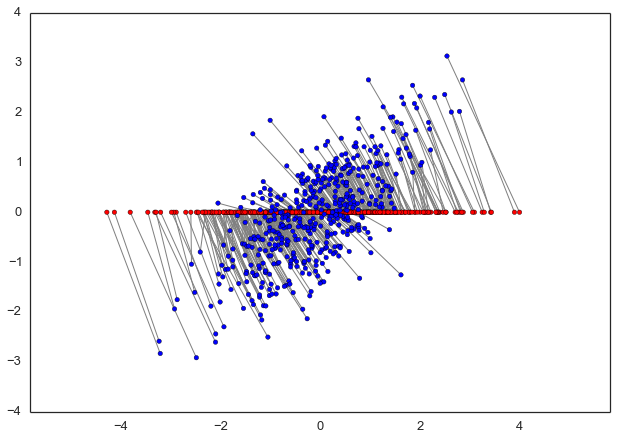

In [176]:
# compare the plots
plt.clf()
zeros = np.zeros_like(projection)
plt.scatter(projection, zeros, c='r', zorder=2)
plt.scatter(x,y,c='b', zorder=2)

for px, py, proj in zip(x,y,projection):
    plt.plot([px,proj],[py,0],c='0.5', linewidth=1.0, zorder=1)
    
plt.axis('equal')
plt.show()

When we calculated the SVD we did a sanity check by reconstructing the original data from the three matrices. All we needed to do was multiply them and we got the original data back. Now we have the points projected down to one dimension. We can still reconstruct them back into the two dimensional space by multiplying with Vh, but because we threw some information away, we cannot completely get the original data points back.

In [179]:
## try to reconstruct back to 2D
## just a reminder
projection = np.dot(U, S[:,:1])
## now the reconstruction
reconstruction = np.dot(projection, Vh[:1,:])
reconstruction.shape

(500L, 2L)

What you can see in the plot below is that the reconstructed data still is a one dimensional line, but now rotated in the two dimensional space of the original data points. The loss of variance in the data actually can be a feature, because the variance along the other dimensions might have been caused by noise in the data. 

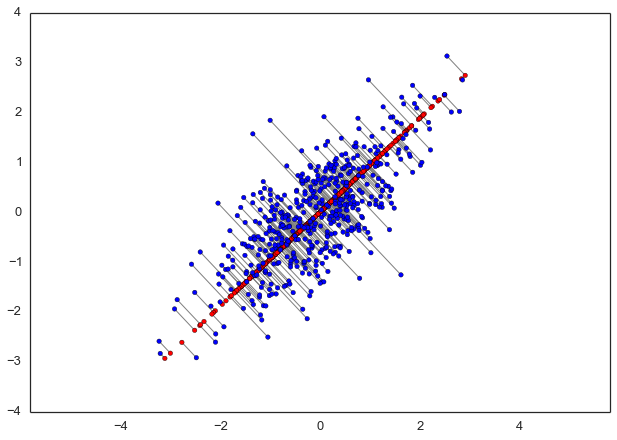

In [180]:
# compare the plots
plt.clf()
zeros = np.zeros_like(projection)
plt.scatter(reconstruction[:,0], reconstruction[:,1], c='r', zorder=2)
plt.scatter(x,y,c='b', zorder=2)

for px, py, rx,ry in zip(x,y,reconstruction[:,0], 
                         reconstruction[:,1]):
    plt.plot([px,rx],[py,ry],c='0.5', linewidth=1.0, zorder=1)
    
plt.axis('equal')
plt.show()